In [3]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

data= pd.read_csv("Downloads\\AAPL.csv")
data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-23,28.605000,28.697500,27.887501,28.177500,26.426001,209924800
1,2016-09-26,27.910000,28.347500,27.887501,28.219999,26.465858,119477600
2,2016-09-27,28.250000,28.295000,28.084999,28.272499,26.515097,98429600
3,2016-09-28,28.422501,28.660000,28.357500,28.487499,26.716732,118564400
4,2016-09-29,28.290001,28.450001,27.950001,28.045000,26.301737,143548000
...,...,...,...,...,...,...,...
1253,2021-09-16,148.440002,148.970001,147.220001,148.789993,148.789993,68034100
1254,2021-09-17,148.820007,148.820007,145.759995,146.059998,146.059998,129728700
1255,2021-09-20,143.800003,144.839996,141.270004,142.940002,142.940002,123478900
1256,2021-09-21,143.929993,144.600006,142.779999,143.429993,143.429993,75834000


In [4]:
data.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1253,False,False,False,False,False,False,False
1254,False,False,False,False,False,False,False
1255,False,False,False,False,False,False,False
1256,False,False,False,False,False,False,False


In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-23,28.605000,28.697500,27.887501,28.177500,26.426001,209924800
1,2016-09-26,27.910000,28.347500,27.887501,28.219999,26.465858,119477600
2,2016-09-27,28.250000,28.295000,28.084999,28.272499,26.515097,98429600
3,2016-09-28,28.422501,28.660000,28.357500,28.487499,26.716732,118564400
4,2016-09-29,28.290001,28.450001,27.950001,28.045000,26.301737,143548000


<AxesSubplot:title={'center':'APPLE Stock Prices'}, ylabel='Close'>

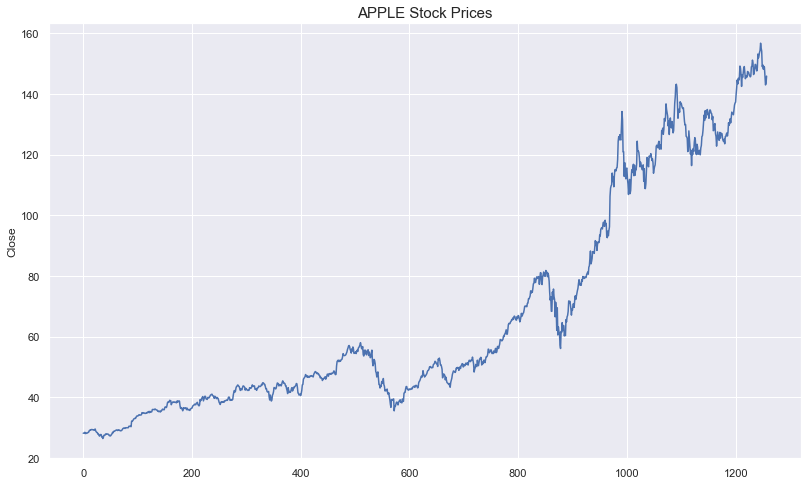

In [6]:
#import dataviz libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline
#Plot " Close"
plt.figure(figsize=(12,8))
plt.title("APPLE Stock Prices", fontsize=15)
sns.lineplot(x=data.index, y='Close', data=data)

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999797  0.999705  0.999507   0.999475 -0.090509
High       0.999797  1.000000  0.999634  0.999740   0.999718 -0.083049
Low        0.999705  0.999634  1.000000  0.999748   0.999716 -0.100564
Close      0.999507  0.999740  0.999748  1.000000   0.999969 -0.092593
Adj Close  0.999475  0.999718  0.999716  0.999969   1.000000 -0.091781
Volume    -0.090509 -0.083049 -0.100564 -0.092593  -0.091781  1.000000


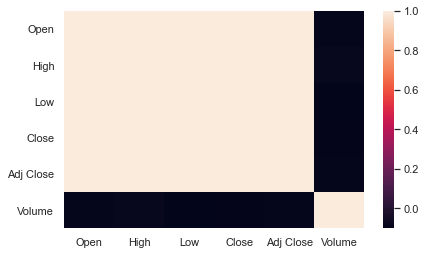

In [7]:
print(data.corr()) 
sns.heatmap(data.corr())
plt.show()

In [8]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
x_train = sc.transform(xtrain)
x_test = sc.transform(xtest)

# DecisionTreeRegressor

In [16]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(min_samples_leaf=280)
dt.fit(xtrain,ytrain)
dt_score=dt.score(xtest,ytest)*100

print(dt_score)

pred=np.array(dt.predict(xtest))
actual=ytest
dt_score=dt.score(xtest,ytest)*100 
dt_rmse=sqrt(mean_squared_error(actual, pred)) 
print(dt_score)
print(dt_rmse)
pred=np.array(dt.predict(xtest))
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

dt_mape=mape(actual,pred)
print("Mean Absolute Percentage error=",dt_mape)

90.79595539400823
90.79595539400823
10.810001397779686
Mean Absolute Percentage error= 61.68350236862715


# SVR

In [17]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
from sklearn.svm import SVR
svr = SVR()
svr.fit(xtrain,ytrain)
pred=np.array(svr.predict(xtest))
actual=ytest
svr_score=svr.score(xtest,ytest)*100 
svr_rmse=sqrt(mean_squared_error(actual, pred)) 
print(svr_score)
print(svr_rmse)
pred=np.array(svr.predict(xtest))
actual=ytest
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

svr_mape=mape(actual,pred)
print("Mean Absolute Percentage error=",svr_mape)

99.33279865250813
2.9104815469098995
Mean Absolute Percentage error= 61.68795892348735


C:\Users\91938\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# RandomForestRegressor

In [18]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1)
rfr.fit(xtrain,ytrain)
pred=np.array(rfr.predict (xtest))
actual=ytest
rfr_score=rfr.score(xtest,ytest)*100 
rfr_rmse=sqrt(mean_squared_error(actual, pred)) 
print(rfr_score)
print(rfr_rmse)

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

dt_mape=mape(actual,pred)
print("Mean Absolute Percentage error=",dt_mape)

99.86224912265473
1.3224631503878292
Mean Absolute Percentage error= 62.729848268169285


<ipython-input-18-534d90dd8875>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain,ytrain)


# ANN

In [19]:
#Importing important libraries
import tensorflow as tf

import keras


from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from keras import layers
from keras import models

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [20]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
classifier.fit(xtrain, ytrain, batch_size = 128, epochs = 100, validation_split=0.05)

Epoch 1/100
8/8 [==============================] - 0s 16ms/step - loss: 5975.2417 - val_loss: 6250.9287
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 5952.2852 - val_loss: 6219.3994
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 5914.4580 - val_loss: 6163.3057
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 5844.5898 - val_loss: 6064.6235
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 5725.8779 - val_loss: 5897.6387
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 5534.1401 - val_loss: 5634.6460
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 5240.5767 - val_loss: 5250.2988
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 4814.7637 - val_loss: 4724.6768
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 4260.8101 - val_loss: 4047.2163
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 

In [21]:
trainScore = classifier.evaluate(xtrain, ytrain, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(xtest, ytest, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.66 MSE (0.81 RMSE)
Test Score: 0.79 MSE (0.89 RMSE)


In [22]:
ANN_mape=classifier.evaluate(xtest,ytest)

8/8 [==============================] - 0s 1ms/step - loss: 0.7865


In [23]:
print("Mean Absolurte Percentage Error:",ANN_mape)

Mean Absolurte Percentage Error: 0.7864806056022644


In [24]:
outputs= [dt_mape,svr_mape,dt_mape,ANN_mape ]
algorithms = ["Decision Tree","Support Vector ","Random Forest Regressor ","ANN"]

for i in range(len(algorithms)):
    print("The mean absolute precentage error achieved using "+algorithms[i]+" is: "+str(outputs[i])+" %")

The mean absolute precentage error achieved using Decision Tree is: 62.729848268169285 %
The mean absolute precentage error achieved using Support Vector  is: 61.68795892348735 %
The mean absolute precentage error achieved using Random Forest Regressor  is: 62.729848268169285 %
The mean absolute precentage error achieved using ANN is: 0.7864806056022644 %


C:\Users\91938\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='MAPE(In Percentage)'>

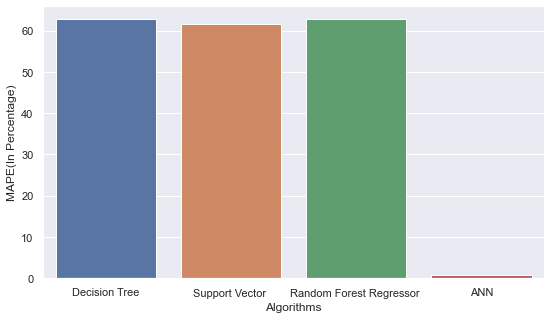

In [25]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8,5)})
plt.xlabel("Algorithms")
plt.ylabel("MAPE(In Percentage)")

sns.barplot(algorithms,outputs)

In [26]:
predictions = classifier.predict(xtest)
print(predictions[:10])

[[ 41.66981 ]
 [ 34.151333]
 [ 27.776524]
 [ 29.385637]
 [136.82878 ]
 [ 47.411446]
 [ 66.58652 ]
 [119.55788 ]
 [131.76202 ]
 [118.00634 ]]


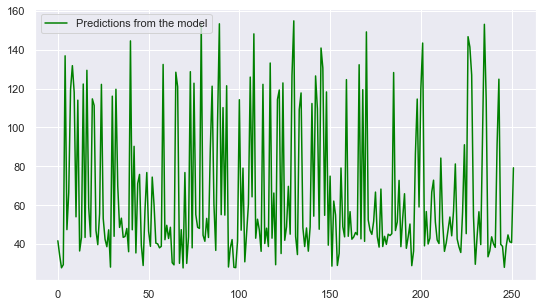

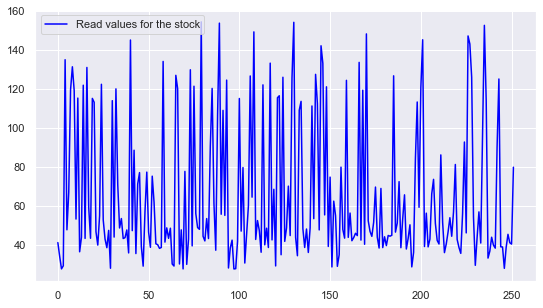

In [27]:
import matplotlib.pyplot as plt
plt.plot(predictions,color='green', label='Predictions from the model')
plt.legend(loc='upper left')
plt.show()
plt.plot(ytest,color='blue', label='Read values for the stock')
plt.legend(loc='upper left')
plt.show()

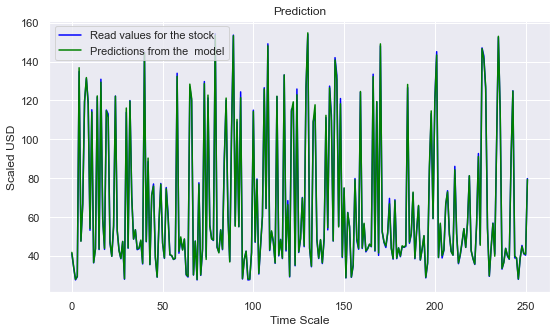

In [28]:
plt.plot(ytest,color='blue', label='Read values for the stock')
plt.plot(predictions,color='green', label='Predictions from the  model')
plt.title("Prediction")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend(loc='upper left')
plt.show()